In [2]:
import numpy as np
import matplotlib.pyplot as plt

from neuralps.diffops import Linear, ReLU, DropOut, Softmax
from neuralps.loss import CategoricalCrossEntropy
from neuralps.metrics import multi_class_accuracy
from neuralps.model import Model

# Loading and Preparing the MNIST Dataset

In [3]:
mnist = np.load('mnist.npz')

vectors_train = mnist['train'].T
train_size = vectors_train.shape[0]

vectors_test = mnist['test'].T
test_size = vectors_test.shape[0]

labels_train = mnist['train_labels'].flatten().astype(int)
labels_test = mnist['test_labels'].flatten().astype(int)

n_classes = 10
n_features = vectors_train.shape[1]

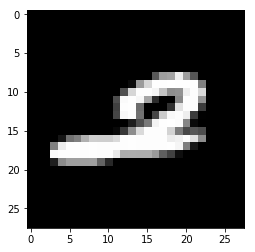

In [4]:
images_train = vectors_train.reshape(-1, 28, 28)

sample_image = images_train[np.random.randint(0, train_size)]
plt.imshow(sample_image, cmap='gray');

In [5]:
vectors_train.min(), vectors_train.max()

(0, 255)

In [6]:
X_train = vectors_train / 255.
X_test = vectors_test / 255.

In [7]:
y_train = np.zeros((train_size, n_classes))
y_test = np.zeros((test_size, n_classes))

y_train[np.arange(train_size), labels_train] = 1
y_test[np.arange(test_size), labels_test] = 1

# Building a Multi-Layer Perceptron Model

In [9]:
np.random.seed(0)

softmax_regression = Model(
    Linear(n_features, n_classes),
    Softmax()
)

softmax_regression.train(
    X_train, y_train,
    loss_function=CategoricalCrossEntropy,
    batch_size=50,
    epochs=10,
    algorithm='rmsprop',
    learning_rate=.001,
    metric=multi_class_accuracy,
    verbose=True,
    X_val=X_test,
    y_val=y_test
)

EPOCH 0
 - train loss: 0.0316     acc: 0.9122
 - val  loss: 0.0307     acc: 0.9164
EPOCH 1
 - train loss: 0.0288     acc: 0.9201
 - val  loss: 0.0284     acc: 0.9206
EPOCH 2
 - train loss: 0.0274     acc: 0.9230
 - val  loss: 0.0275     acc: 0.9225
EPOCH 3
 - train loss: 0.0267     acc: 0.9257
 - val  loss: 0.0269     acc: 0.9257
EPOCH 4
 - train loss: 0.0263     acc: 0.9269
 - val  loss: 0.0269     acc: 0.9257
EPOCH 5
 - train loss: 0.0257     acc: 0.9286
 - val  loss: 0.0266     acc: 0.9252
EPOCH 6
 - train loss: 0.0255     acc: 0.9282
 - val  loss: 0.0266     acc: 0.9252
EPOCH 7
 - train loss: 0.0252     acc: 0.9307
 - val  loss: 0.0265     acc: 0.9248
EPOCH 8
 - train loss: 0.0249     acc: 0.9312
 - val  loss: 0.0263     acc: 0.9277
EPOCH 9
 - train loss: 0.0249     acc: 0.9312
 - val  loss: 0.0263     acc: 0.9261


In [10]:
np.random.seed(0)

n_hidden_units = 512
keep_prob = .25

mlp = Model(
    Linear(n_features, n_hidden_units),
    ReLU(),
    DropOut(keep_prob),
    Linear(n_hidden_units, n_classes),
    Softmax()
)

mlp.train(
    X_train, y_train,
    loss_function=CategoricalCrossEntropy,
    batch_size=50,
    epochs=10,
    algorithm='rmsprop',
    learning_rate=.001,
    metric=multi_class_accuracy,
    verbose=True,
    X_val=X_test,
    y_val=y_test,
    save_best_model='mlp-mnist.npz'
)

EPOCH 0
 - train loss: 0.0152     acc: 0.9554
 - val  loss: 0.0155     acc: 0.9546
EPOCH 1
 - train loss: 0.0108     acc: 0.9678
 - val  loss: 0.0117     acc: 0.9638
EPOCH 2
 - train loss: 0.0092     acc: 0.9724
 - val  loss: 0.0101     acc: 0.9694
EPOCH 3
 - train loss: 0.0078     acc: 0.9765
 - val  loss: 0.0096     acc: 0.9717
EPOCH 4
 - train loss: 0.0070     acc: 0.9799
 - val  loss: 0.0092     acc: 0.9732
EPOCH 5
 - train loss: 0.0061     acc: 0.9817
 - val  loss: 0.0087     acc: 0.9771
EPOCH 6
 - train loss: 0.0054     acc: 0.9843
 - val  loss: 0.0081     acc: 0.9766
EPOCH 7
 - train loss: 0.0052     acc: 0.9845
 - val  loss: 0.0081     acc: 0.9777
EPOCH 8
 - train loss: 0.0047     acc: 0.9863
 - val  loss: 0.0075     acc: 0.9791
EPOCH 9
 - train loss: 0.0045     acc: 0.9866
 - val  loss: 0.0080     acc: 0.9782


In [12]:
loaded_mlp = Model.load('mlp-mnist.npz')

y_pred = loaded_mlp.predict(X_test)

multi_class_accuracy(y_test, y_pred)

0.9791